In [1]:
from environment.hydroenv import HydroEnv
from algorithms import DynamicProgramming, Qlearning
from algorithms.dqn import ReplayBuffer, DQNAgent
from algorithms.reinforce import ReinforceAgent

import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
import gym

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import random
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)

ImportError: cannot import name 'PolicyNetwork' from partially initialized module 'algorithms.reinforce' (most likely due to a circular import) (/Users/oli.dmrs/Documents/Personal Projects/Deep-RL-Hydro/algorithms/reinforce/__init__.py)

## Dynamic Programming

In [13]:
np.random.seed(1)
i0 = int(max(10 + 5 * np.random.normal(loc = 0, scale = 1), 0))
i1 = int(max(i0 + 5 * np.random.normal(loc = 0, scale = 1), 0))
i2 = int(max(2 * i1 + 5 * np.random.normal(loc = 0, scale = 1), 0))

env = HydroEnv(
    t = 3,
    l_max = 100,
    l_min = 0,
    punition = -100,
    deterministic_inflows = [i0, i1, i2]
)

dp = DynamicProgramming(
    env
)
v, pi = dp.dynamic_prog_solution2()

print(f'Waterinflows: {i0, i1, i2}')
pi_t0, waterlevels_t0, reward = dp.policy_extraction(pi, 40)
print(f'Actions taken starting at l0 = 40: {pi_t0}')
print(f'Waterlevels for each timestep: {waterlevels_t0}')
print(f'Reward: {reward}')

Waterinflows: (18, 14, 25)
0
6.198478716492308
1
6.643789733147672
2
7.028201432058005
Actions taken starting at l0 = 40: [11, 15, 23]
Waterlevels for each timestep: [40, 47, 46, 48]
Reward: 27.65411047791924


## Q learning

In [2]:
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)

env = HydroEnv(
    t = 3,
    l_max = 100,
    l_min = 0,
    punition = -100
)

Q_model = Qlearning(
    env = env,
    gamma = 0.85,
    episodes = 120000,
    learning_rate = 1,
    learning_rate_decay = 0.999995,
    epsilon = 1,
    epsilon_decay = 0.999945,
    min_epsilon = 0.1
)

epsilon_history, reward_history_Q = Q_model.qlearning_solver()

ep: 0 %: 0.0 %
epsilon: 1
learning rate: 1 
ep: 10000 %: 8.333333333333332 %
epsilon: 0.5769410837604694
learning rate: 0.9512293055963315 
ep: 20000 %: 16.666666666666664 %
epsilon: 0.3328610141306998
learning rate: 0.9048371918252833 
ep: 30000 %: 25.0 %
epsilon: 0.19204119423417287
learning rate: 0.8607076536577085 
ep: 40000 %: 33.33333333333333 %
epsilon: 0.11079645472811785
learning rate: 0.8187303437102744 
ep: 50000 %: 41.66666666666667 %
epsilon: 0.1
learning rate: 0.7788002963181708 
ep: 60000 %: 50.0 %
epsilon: 0.1
learning rate: 0.7408176650649587 
ep: 70000 %: 58.333333333333336 %
epsilon: 0.1
learning rate: 0.7046874731132381 
ep: 80000 %: 66.66666666666666 %
epsilon: 0.1
learning rate: 0.6703193757119477 
ep: 90000 %: 75.0 %
epsilon: 0.1
learning rate: 0.6376274342862472 
ep: 100000 %: 83.33333333333334 %
epsilon: 0.1
learning rate: 0.6065299015452864 
ep: 110000 %: 91.66666666666666 %
epsilon: 0.1
learning rate: 0.5769490170703353 

 Exploration rate: 20.1 %
Exploitatio

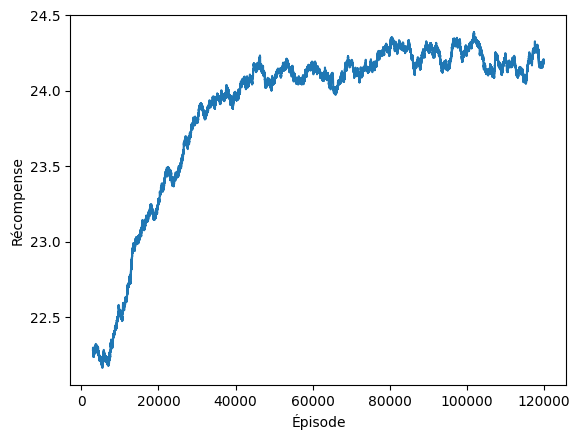

In [7]:
window = 3000
data = np.array(reward_history_Q)
moving_avg = np.convolve(data, np.ones(window)/window, mode='valid')
xticks_Q = [ep for ep in range(Q_model.episodes)]

plt.plot(xticks_Q[window-1:], moving_avg)
plt.ticklabel_format(style = 'plain')
plt.xlabel('Épisode')
plt.ylabel('Récompense')
# plt.savefig('images/Q-learning_reward.png')
plt.show()

In [14]:
np.random.seed(1)
i0 = int(max(10 + 5 * np.random.normal(loc = 0, scale = 1), 0))
i1 = int(max(i0 + 5 * np.random.normal(loc = 0, scale = 1), 0))
i2 = int(max(2 * i1 + 5 * np.random.normal(loc = 0, scale = 1), 0))

pi_Q, waterlevel_Q, inflow_Q, reward = Q_model.extract_policy(40, [i0, i1, i2, 0])

print(f'Waterinflows: {inflow_Q}')
print(f'Actions taken starting at l0 = 40: {pi_Q}')
print(f'Waterlevels for each timestep: {waterlevel_Q}')
print(f'Reward: {reward}')

Waterinflows: [18, 14, 25, 0]
Actions taken starting at l0 = 40: [33, 27, 13]
Waterlevels for each timestep: [40, 25, 12, 24]
Reward: 25.471991976330354


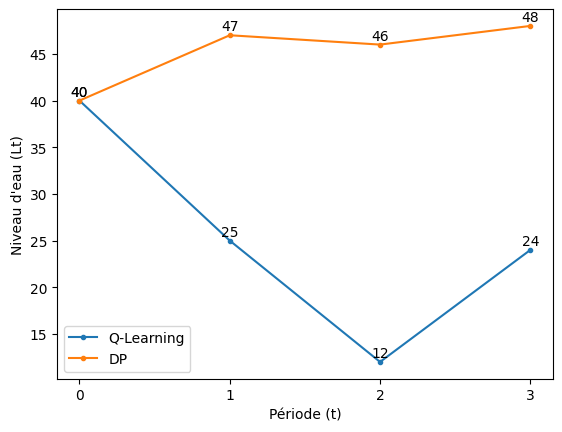

In [15]:
x = [0,1,2,3]

plt.plot(x, waterlevel_Q, marker = '.', label = 'Q-Learning')
plt.plot(x, waterlevels_t0, marker = '.', label = 'DP')
for i, txt in enumerate(waterlevel_Q):
    plt.text(x[i], waterlevel_Q[i] + 0.2, str(txt), ha='center', va='bottom')
for i, txt in enumerate(waterlevels_t0):
    plt.text(x[i], waterlevels_t0[i] + 0.2, str(txt), ha='center', va='bottom')
locator = ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
plt.xlabel('Période (t)')
plt.ylabel("Niveau d'eau (Lt)")
plt.legend()
plt.savefig('/Users/oli.dmrs/Library/CloudStorage/OneDrive-HECMontréal/StageHEC2025/images_graph/DPvsQlearning.png')
plt.show()

In [ ]:
# def simulation(n : int) -> np.ndarray:
#     results = np.zeros(n)
#     count_non_visted = 0
#     for n in range(n):
#         pi, waterlevel, inflows = Q_model.extract_policy(40)
#         output = Q_model.extract_reward_of_pi(waterlevel, pi)
#         count_non_visted += Q_model.compute_non_visited_count(waterlevel, inflows, pi)
#         results[n] = output
#     return results, count_non_visted

# results, non_visited = simulation(5000) 
# print(non_visited)
# print(np.mean(results))
# print(np.std(results))

6
17.806536879185785
1.6434852872884864


## DQN

In [135]:
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)

episodes = 700000

batch_size = 32
update_target = 300

# Definition of the environment
env = HydroEnv(
    t = 3,
    l_max = 100,
    l_min = 0,
    punition = -50
)

# Definition of the DQN agent
dqn_agent = DQNAgent(
    input_dim = env.observation_space.shape[0],
    output_dim = env.action_space.n * 2,
    nb_hidden = 2,
    hidden_size = 100,
    replay_buffer = ReplayBuffer(5000),
    learning_rate = 0.001,
    env = env,
    gamma = 0.9,
    init_eps = 1,
    final_eps = 0.1,
    eps_decay_rate = 0.9999969,
    learning_decay_rate = 1,
    final_learning_rate = 0.000005
)

# 0.99999975
reward_history = []
truncated_history = []
epsilon_history_DQN = []
count_truncated = 0
for episode in range(episodes):
    # Reset environment which implies randomly generating a state
    env.reset()
    episode_reward = 0
    epsilon_history_DQN.append(dqn_agent.eps)
    dqn_agent.epsilon_decay()
    if episode % update_target == 0:
        dqn_agent.update_target_network()
    
    for t in range(env.t):
        state = env.state
        action, truncated_from_action = dqn_agent.choose_action(state)
        
        next_state, reward, done, truncated, info = env.step(action)

        dqn_agent.replay_buffer.add(state, action, reward, next_state, done)
        dqn_agent.update(batch_size)
        episode_reward += reward

        if done or truncated:
            if truncated:
                count_truncated += 1
                truncated_history.append(episode)
            break
    
    reward_history.append(episode_reward)
    dqn_agent.alpha_decay()
    if episode % 10000 == 0:
        print(f'Episode: {episode}, % of episodes: {episode/episodes * 100} %')
        print(f'epsilon: {round(dqn_agent.eps, 2)}')
        print(f'alpha: {dqn_agent.learning_rate}')

print(f'\n\n % of decisions which were eploration: {dqn_agent.exploration_episodes/(dqn_agent.exploration_episodes + dqn_agent.exploitation_episodes) * 100} %')
print(f'% of truncated decisions: {count_truncated/(dqn_agent.exploration_episodes + dqn_agent.exploitation_episodes) * 100} %')
dqn_agent.exploitation_episodes = 0
dqn_agent.exploration_episodes = 0

Episode: 0, % of episodes: 0.0 %
epsilon: 1.0
alpha: 0.001
Episode: 10000, % of episodes: 1.4285714285714286 %
epsilon: 0.97
alpha: 0.001
Episode: 20000, % of episodes: 2.857142857142857 %
epsilon: 0.94
alpha: 0.001
Episode: 30000, % of episodes: 4.285714285714286 %
epsilon: 0.91
alpha: 0.001
Episode: 40000, % of episodes: 5.714285714285714 %
epsilon: 0.88
alpha: 0.001
Episode: 50000, % of episodes: 7.142857142857142 %
epsilon: 0.86
alpha: 0.001
Episode: 60000, % of episodes: 8.571428571428571 %
epsilon: 0.83
alpha: 0.001
Episode: 70000, % of episodes: 10.0 %
epsilon: 0.8
alpha: 0.001
Episode: 80000, % of episodes: 11.428571428571429 %
epsilon: 0.78
alpha: 0.001
Episode: 90000, % of episodes: 12.857142857142856 %
epsilon: 0.76
alpha: 0.001
Episode: 100000, % of episodes: 14.285714285714285 %
epsilon: 0.73
alpha: 0.001
Episode: 110000, % of episodes: 15.714285714285714 %
epsilon: 0.71
alpha: 0.001
Episode: 120000, % of episodes: 17.142857142857142 %
epsilon: 0.69
alpha: 0.001
Episode: 1

In [40]:
# torch.save(dqn_agent.dqn.state_dict(), '/Users/oli.dmrs/Library/CloudStorage/OneDrive-HECMontréal/StageHEC2025/models/dqn_v1.pth')
list_reward = []

In [136]:
list_reward.append(reward_history)
if len(list_reward) == 3:
    list_reward.pop(0)

In [120]:
print(list_reward[0] == list_reward[1])
print(len(list_reward[0]))
print(len(list_reward[1]))

False
500000
500000


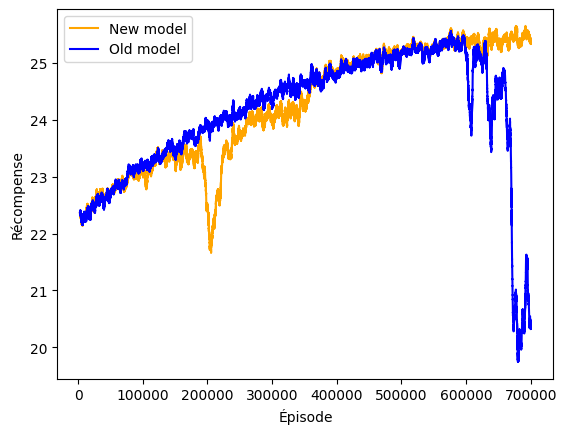

In [137]:
window = 3000
def set_window(rewards):
    data = np.array(rewards)
    moving_avg = np.convolve(data, np.ones(window)/window, mode='valid')
    return moving_avg
xticks = [ep for ep in range(episodes)]
plt.plot(xticks[window-1:], set_window(list_reward[1]), color = 'orange', label = 'New model') #new
plt.plot(xticks[window-1:], set_window(list_reward[0]), color = 'b', label = 'Old model') #old
plt.legend()
plt.xlabel('Épisode')
plt.ylabel('Récompense')
# plt.savefig('images/DQN_reward.png')
plt.show()

Text(0, 0.5, "Arrêt d'épisode (Bris de contrainte)")

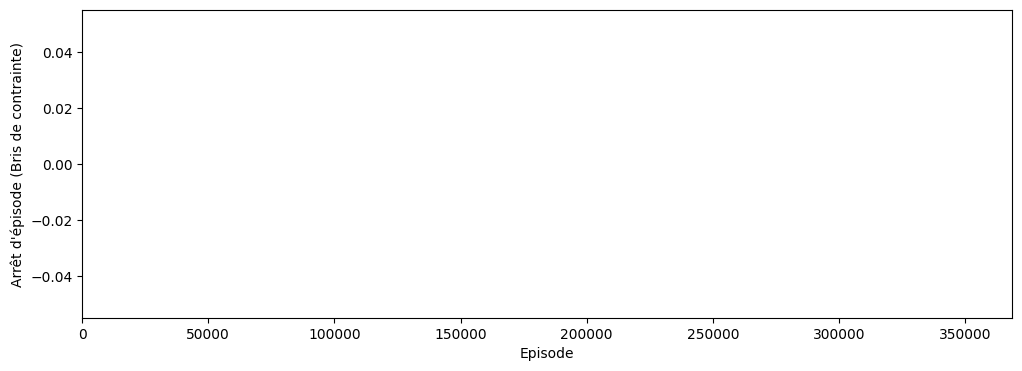

In [4]:

episodes = 350000
window = 3000
bins = np.arange(0, episodes + window, window)
hist, _ = np.histogram(truncated_history, bins=bins)

plt.figure(figsize=(12, 4))
plt.bar(bins[:-1], hist, width=window, align='edge')
plt.xlim(left=0)
plt.xlabel('Episode')
plt.ylabel("Arrêt d'épisode (Bris de contrainte)")
# plt.savefig('images/DQN_truncation.png')

In [ ]:
def simulation(n : int):
    dp_cumulative = np.zeros(n)
    qlearning_cumulative = np.zeros(n)
    dqn_cumulative = np.zeros(n)
    nb_qlearning_nonvisited = 0
    for episode in range(n):
        waterlevel_t0 = random.randint(0,99)

        if episode % 1000 == 0:
            print(episode)

        qlearning_reward = 0
        dqn_reward = 0
        env.reset()

        waterlevel_q = waterlevel_t0
        waterlevel_dqn = waterlevel_t0
        i0 = int(max(10 + 5 * np.random.normal(loc = 0, scale = 1), 0))
        i1 = int(max(i0 + 5 * np.random.normal(loc = 0, scale = 1), 0))
        i2 = int(max(2 * i1 + 5 * np.random.normal(loc = 0, scale = 1), 0))
        inflows = [i0, i1, i2]
        dp_env = HydroEnv(
            t = 3,
            l_max = 100,
            l_min = 0,
            punition = -100,
            deterministic_inflows = inflows
        )

        dp = DynamicProgramming(dp_env)
        v, pi = dp.dynamic_prog_solution2()
        pi_t0, waterlevels_t0, reward = dp.policy_extraction(pi, waterlevel_t0)
        dp_cumulative[episode] = reward
        for t in range(env.t):
            dqn_action = dqn_agent.dqn.act(dqn_agent.dqn.forward(torch.tensor([waterlevel_dqn, inflows[t], t], dtype=torch.float32)))
            waterlevel_dqn = waterlevel_dqn + inflows[t] - dqn_action
            dqn_reward += env.get_current_reward(t, waterlevel_dqn, dqn_action)[0]
            
            q_action = np.argmax(Q_model.Q_table[t, waterlevel_q, inflows[t], :])
            if Q_model.visit_counts[t, waterlevel_q, inflows[t], q_action] == 0.0:
                nb_qlearning_nonvisited += 1
            waterlevel_q = waterlevel_q + inflows[t] - q_action
            qlearning_reward += env.get_current_reward(t, waterlevel_q, q_action)[0]
            
        qlearning_cumulative[episode] = qlearning_reward
        dqn_cumulative[episode] = dqn_reward
    return dp_cumulative, qlearning_cumulative, dqn_cumulative, nb_qlearning_nonvisited

dp_cumulative, qlearning_cumulative, dqn_cumulative, nb_qlearning_nonvisited = simulation(2000) 


0
1000


In [ ]:
print(np.mean(dp_cumulative))
print(np.mean(qlearning_cumulative))

print('')

print(np.std(dp_cumulative))
print(np.std(qlearning_cumulative))
print('')
print(nb_qlearning_nonvisited)

print('')
print(np.mean(dqn_cumulative))
print(np.std(dqn_cumulative))
print(np.mean(dqn_cumulative[np.where(dqn_cumulative>0)]))
print(dqn_cumulative[np.where(dqn_cumulative<0)].shape)



18.950301450577317
16.843454729322286

3.6246928156393565
3.2391363384601752

2

15.6231952853073
17.08482157716872
19.076870839901503
(98,)


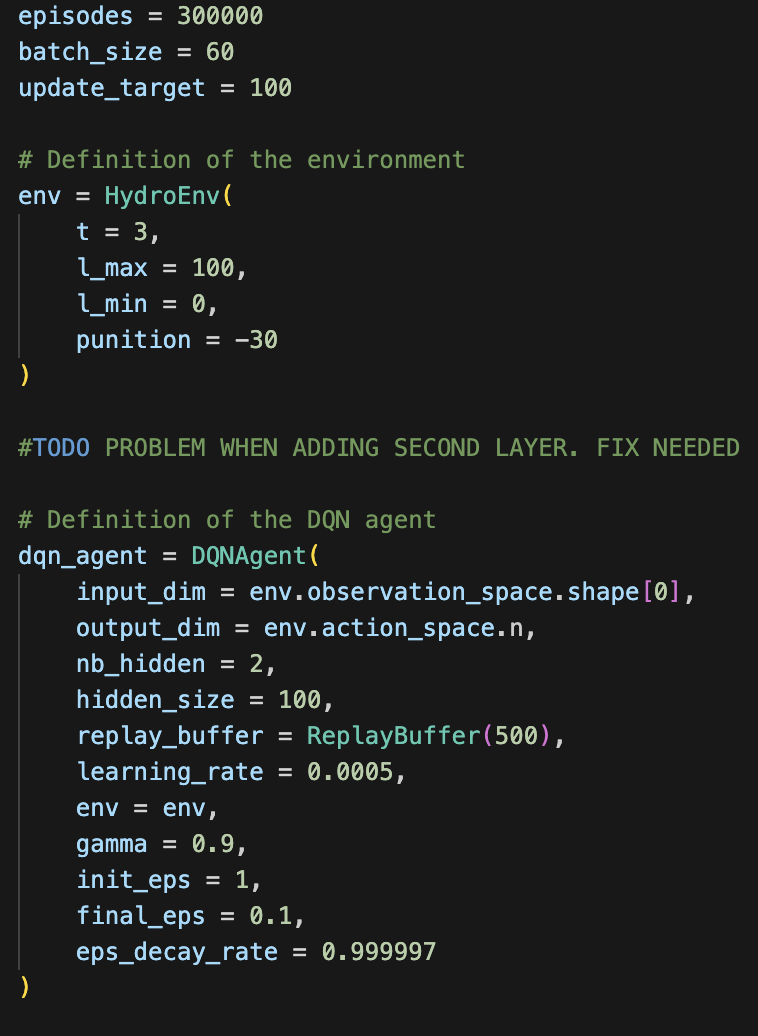

In [ ]:
def simulation(n : int):
    dqn_cumulative = np.zeros(n)
    qlearning_cumulative = np.zeros(n)
    nb_qlearning_nonvisited = 0
    for episode in range(n):
        dqn_reward = 0
        qlearning_reward = 0
        env.reset()
        waterlevel_dqn = 40
        waterlevel_q = 40
        for t in range(env.t):
            i = env.get_inflow(t)
            dqn_action = dqn_agent.dqn.act(dqn_agent.dqn.forward(torch.tensor([waterlevel_dqn, i, t], dtype=torch.float32)))
            waterlevel_dqn = waterlevel_dqn + i - dqn_action
            dqn_reward += env.get_current_reward(t, waterlevel_dqn, dqn_action)[0]

            q_action = np.argmax(Q_model.Q_table[t, waterlevel_q, i, :])
            if Q_model.visit_counts[t, waterlevel_q, i, q_action] == 0.0:
                nb_qlearning_nonvisited += 1
            waterlevel_q = waterlevel_q + i - q_action
            qlearning_reward += env.get_current_reward(t, waterlevel_q, q_action)[0]
            
        dqn_cumulative[episode] = dqn_reward
        qlearning_cumulative[episode] = qlearning_reward
    return dqn_cumulative, qlearning_cumulative, nb_qlearning_nonvisited

dqn_cumulative, qlearning_cumulative, nb_qlearning_nonvisited = simulation(5000) 

In [ ]:
print(dqn_cumulative)
print(qlearning_cumulative)
print(nb_qlearning_nonvisited)

print(dqn_cumulative.mean())
print(qlearning_cumulative.mean())
print('')
print(dqn_cumulative.std())
print(qlearning_cumulative.std())

[17.68309671 18.7254146  17.95037499 ... 18.22530799 18.83077512
 17.61657519]
[13.81342839 17.55780944 17.96434899 ... 16.80713842 17.63114072
 17.02903963]
1
13.707885030868004
17.040970360128995

21.912860601431987
1.4227789757612979


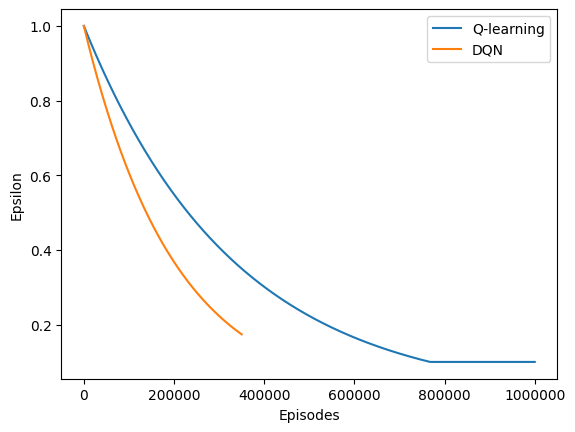

In [ ]:
xticks = [ep for ep in range(1000000)]
# plt.xticks(xticks)

plt.plot(xticks, epsilon_history, label = 'Q-learning')
  
plt.ticklabel_format(style = 'plain')
plt.plot(epsilon_history_DQN, label = 'DQN')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Epsilon')
plt.savefig('images/epsilon-comparaison.png')
plt.show()

## REINFORCE

In [ ]:
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)

episodes = 10000

env = HydroEnv(
    t = 3,
    l_max = 100,
    l_min = 0,
    punition = -50
)

reinforce = ReinforceAgent(
    input_dim = env.observation_space.shape[0],
    output_dim = env.action_space.n * 2,
    nb_hidden = 2,
    hidden_size = 100,
    gamma = 0.9,
    learning_rate = 0.001,
    env = env
)

for episode in range(episodes):
    if episode % 1000 == 0: 
        print(f'Episode: {episode}, % of episodes: {episode/episodes * 100} %')
    
    actions, states, rewards = reinforce.gather_an_episode()

    discounted_rewards = reinforce.discount_rewards(rewards)
    reinforce.update(states, actions, discounted_rewards)


